In [1]:
#Predicting the closing stock price of a corporation. Using the past 6 months data

In [2]:
#Import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
#Get the stock quote
df= web.DataReader('TSLA', data_source='yahoo', start='2010-01-01', end='2020-07-15')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2020-07-09,1408.560059,1351.280029,1396.989990,1394.280029,11717600,1394.280029
2020-07-10,1548.920044,1376.010010,1396.000000,1544.650024,23337600,1544.650024
2020-07-13,1794.989990,1471.109985,1659.000000,1497.060059,38985400,1497.060059


In [4]:
#EDA
df.shape

(2529, 6)

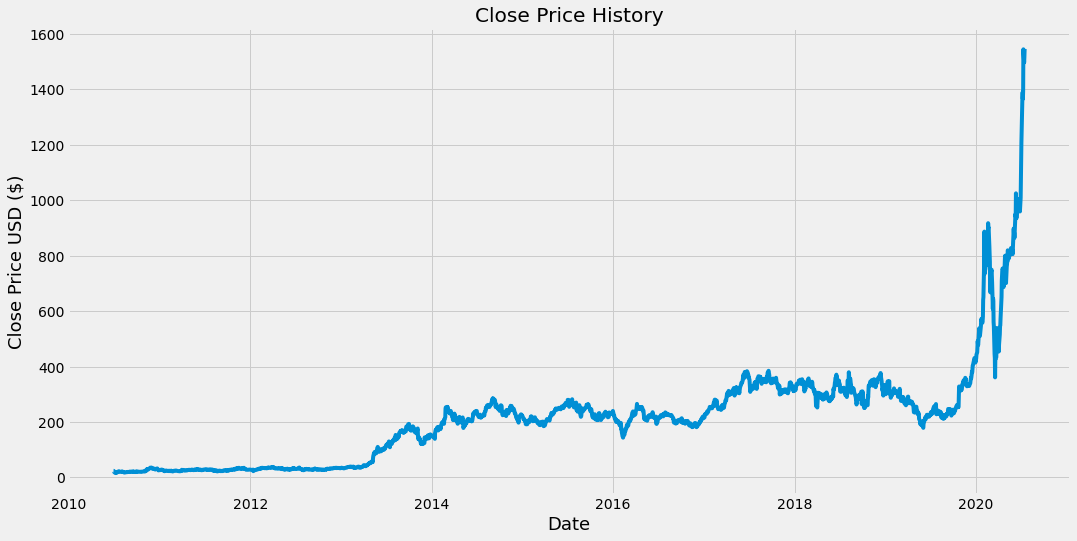

In [5]:
#Visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with only the close column
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
#Get the no. of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

2024

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00528686],
       [0.00524765],
       [0.00402559],
       ...,
       [0.96801096],
       [0.98091114],
       [1.        ]])

In [8]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train datasets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00528686, 0.00524765, 0.00402559, 0.00222192, 0.00020259,
       0.        , 0.00108482, 0.00104561, 0.00081688, 0.0015292 ,
       0.00264016, 0.00267284, 0.00316296, 0.00399292, 0.00294077,
       0.00288849, 0.00339823, 0.00358774, 0.00336555, 0.00310415,
       0.00321524, 0.00297345, 0.00270551, 0.00334595, 0.00401906,
       0.00356814, 0.0030388 , 0.00247678, 0.00248332, 0.00211082,
       0.00137236, 0.00117631, 0.00164683, 0.00194745, 0.00218924,
       0.00194091, 0.00195398, 0.00215657, 0.00282968, 0.00222192,
       0.00267937, 0.00258134, 0.00254867, 0.00265977, 0.0024049 ,
       0.0030388 , 0.00343744, 0.0034309 , 0.00309761, 0.00333288,
       0.00320871, 0.00285582, 0.00321524, 0.00347665, 0.00403866,
       0.00335902, 0.00289503, 0.00343744, 0.00324792, 0.00265977])]
[0.002457178590964837]

[array([0.00528686, 0.00524765, 0.00402559, 0.00222192, 0.00020259,
       0.        , 0.00108482, 0.00104561, 0.00081688, 0.0015292 ,
       0.00264016, 0.00267284, 0.0

In [9]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1964, 60, 1)

In [11]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1964/1964 [==============================] - 64s 33ms/step - loss: 1.6695e-04


In [14]:
#Create the testing dataset
#Create a new array containing scaled values from index 2023 to 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [15]:
#Convert data into numpy array
x_test = np.array(x_test)

In [16]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#Get the root mean squared error (RMSE)- 
#how accurate model responds low rmse better fit model
# 0 mse means exact predictions

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

39.76895658285311

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


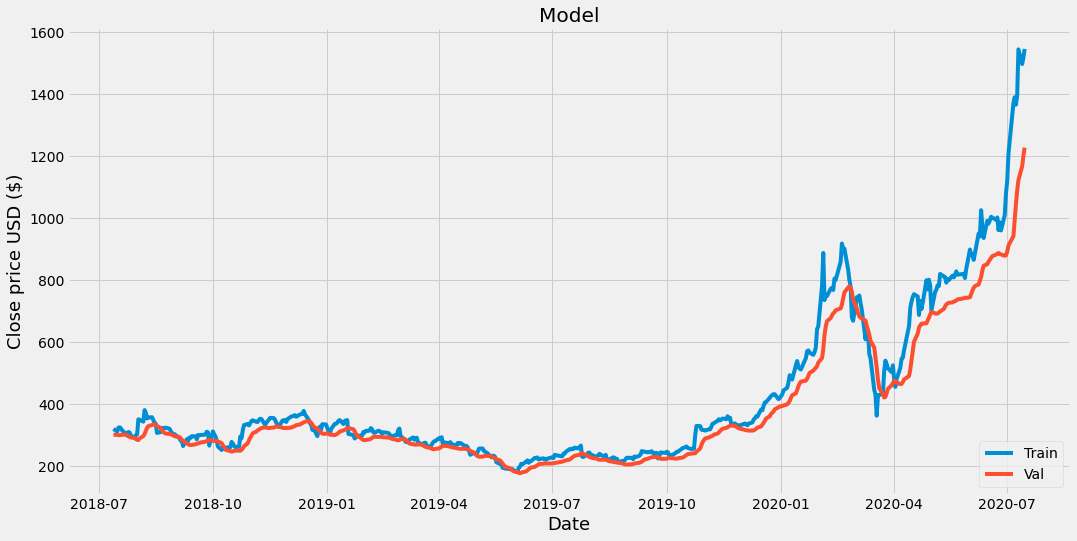

In [19]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
#Show the valid and Predicted prices
valid

,Close,Predictions
Date,,
2018-07-13,318.869995,299.664703
2018-07-16,310.100006,299.364563
2018-07-17,322.690002,298.285095
2018-07-18,323.850006,298.476562
2018-07-19,320.230011,299.370728
...,...,...
2020-07-09,1394.280029,1087.207397
2020-07-10,1544.650024,1122.356079
2020-07-13,1497.060059,1166.560669


In [21]:
#Get the quote
tesla_quote = web.DataReader('TSLA', data_source='yahoo', start='2010-01-01', end='2020-07-16')
#Create a new Dataframe
new_df = tesla_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values btwn 0 & 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
X_test = []
#Appendthe past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1249.8387]]
